# eYantra openCV task

##### in this task we will detect specific object in an image and draw a bounding box around it with a point at the center of the object (centroid)

### here is an example of the output we want to achieve

### Input image

![input image](./input/inPercep.png)

### expected Output image

![output image](./output/outPercep.png)

---

In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

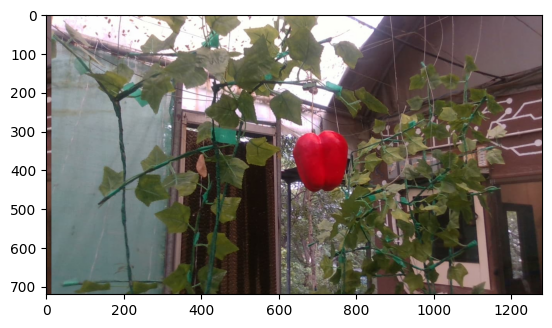

In [2]:
# Load the image in RGB format
image_path = './input/exercise1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)

In [3]:
# function to display image easily
def display_image(image, image_name='Untitled', cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.title(image_name)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

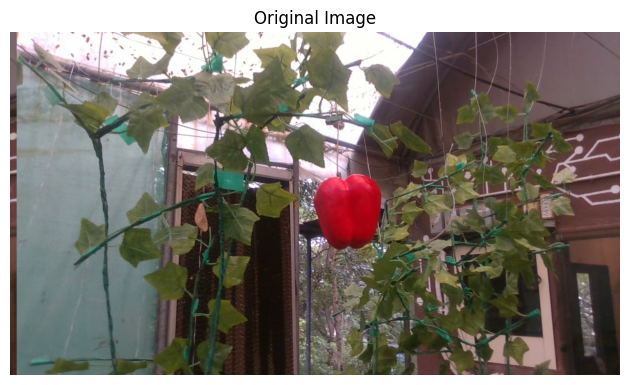

In [4]:
# Display the original image
display_image(image, 'Original Image')

### Get the RGB values of the color that you want to detect using any tool (I used [this](https://chrome.google.com/webstore/detail/smart-color-picker/ilifjbbjhbgkhgabebllmlcldfdgopfl))

In [5]:
# calculate the lower and upper bound of a color
color = np.uint8([[[17,1,166]]])
hsv_green = cv2.cvtColor(color,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[177 253 166]]]


### Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively. try to adjust the values to get the best result. this is the most important part of the task and a little bit tricky.

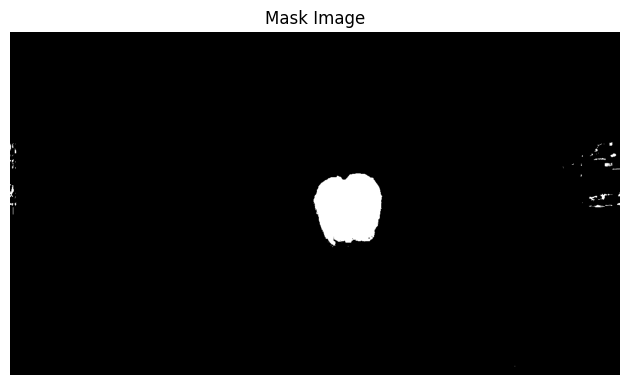

In [6]:
# Define the color range to detect (in this example, we'll detect green color)
lower_color = np.array([166, 100, 100])  # Lower range of red color in BGR format
upper_color = np.array([188, 255, 255])  # Upper range of red color in BGR format

# Convert the image to HSV format
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Create a mask using the given color range
mask = cv2.inRange(hsv_image, lower_color, upper_color)

# Display the mask
display_image(mask, 'Mask Image', cmap='gray')

### filter and clear the image using morphological operations leaving only the biggest object in the image

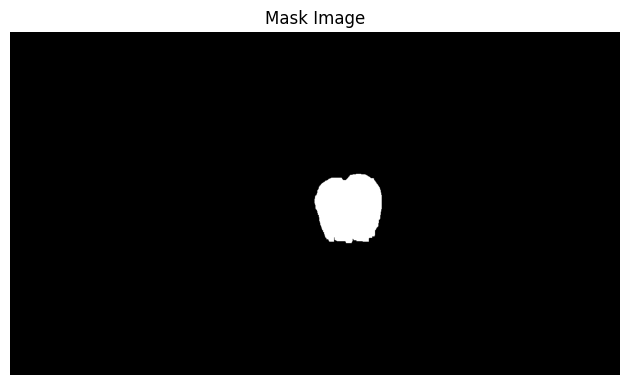

In [9]:
# clear the noise
kernel = np.ones((10,10),np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Display the mask
display_image(opening, 'Mask Image', cmap='gray')

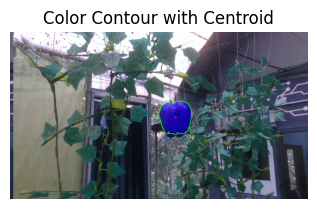

In [11]:
# Find contours of the detected color regions
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and mark centroids on the original image
image_copy = image.copy()
for contour in contours:
    # Draw contour
    cv2.drawContours(image_copy, [contour], -1, (0, 255, 0), 2)

    # Calculate and mark centroid
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(image_copy, (cX, cY), 5, (0, 0, 255), -1)



# Display the image with contour and centroid
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title('Color Contour with Centroid')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()